In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

# Assignment
In this assignment, we'll be working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

### Load the Dataset

In [2]:
#Database Credentials:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Use the connection to extract SQL data
heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

# Close the connection
engine.dispose()

### Pre-Processing

In [4]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

## 1. Apply DBSCAN to the heart disease data by trying different values for `eps` and `min_samples` parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

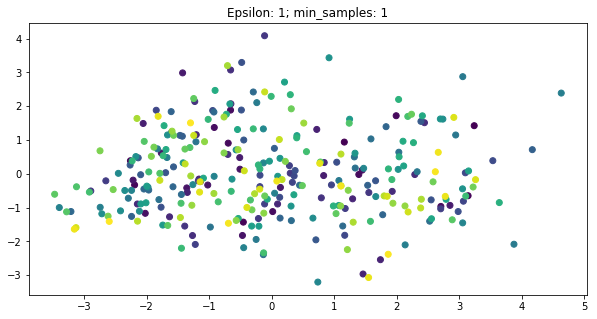

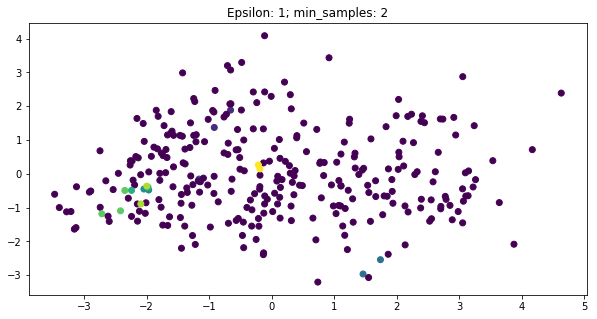

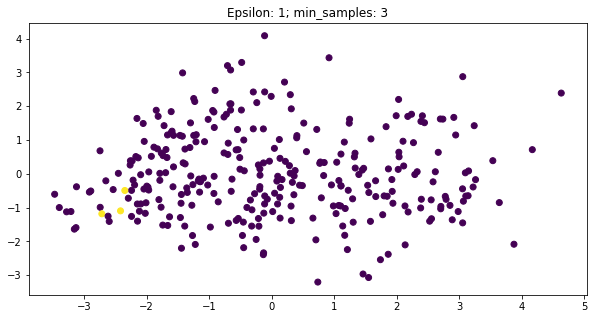

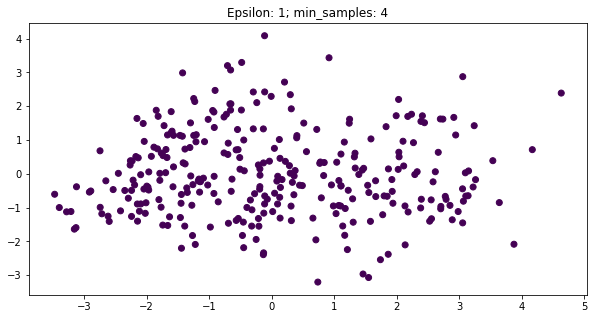

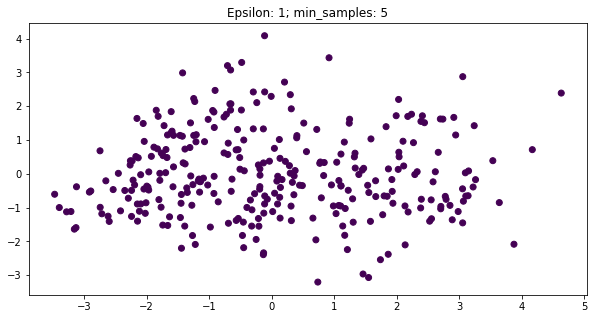

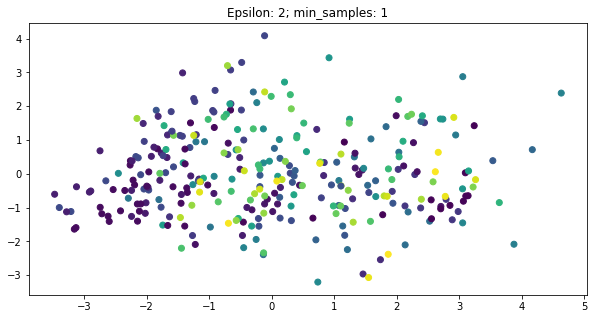

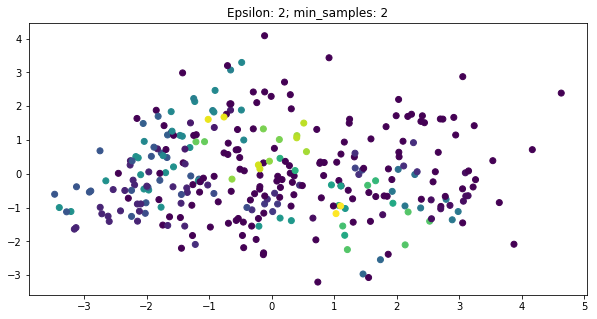

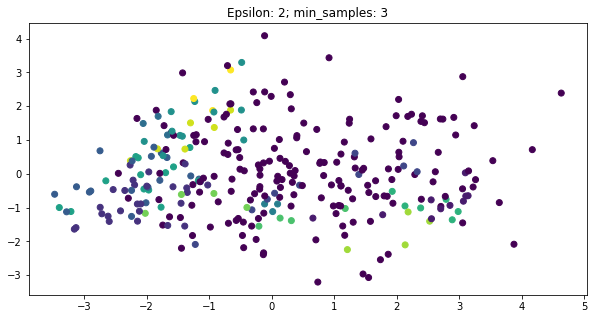

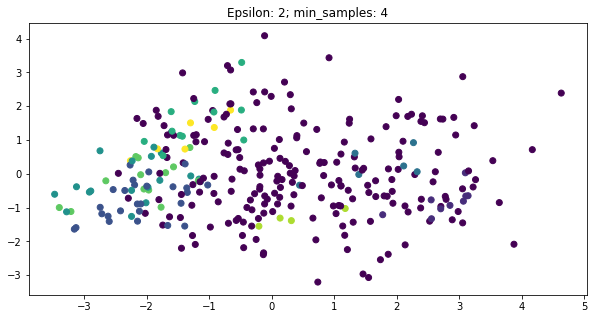

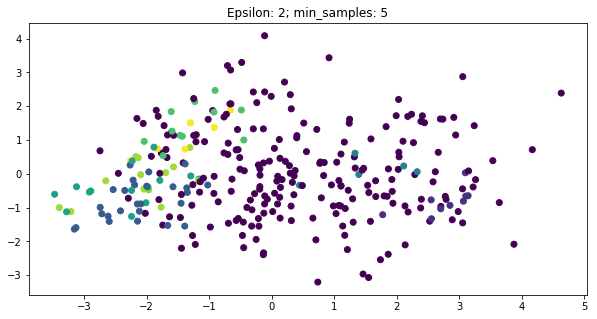

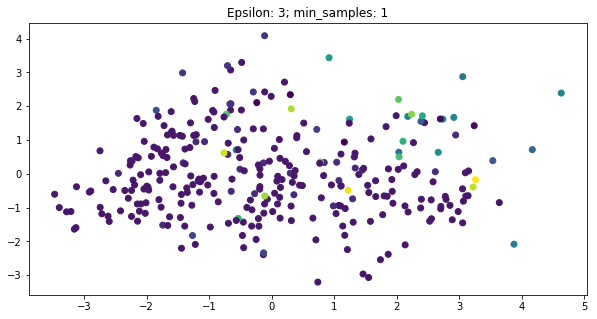

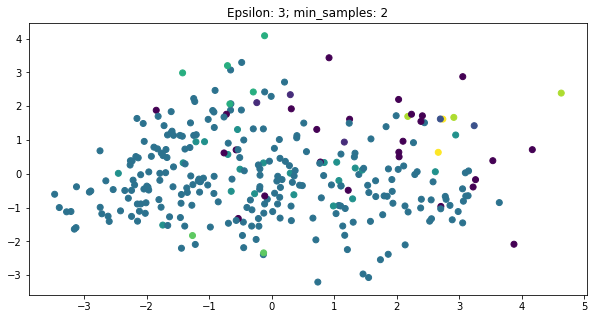

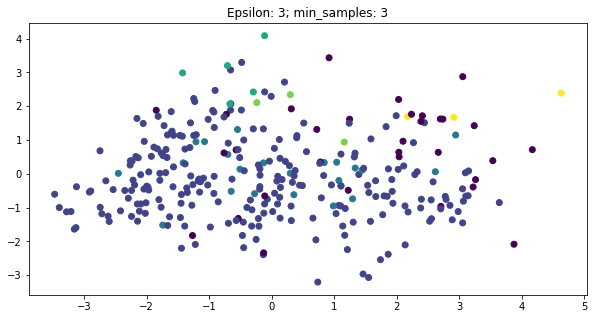

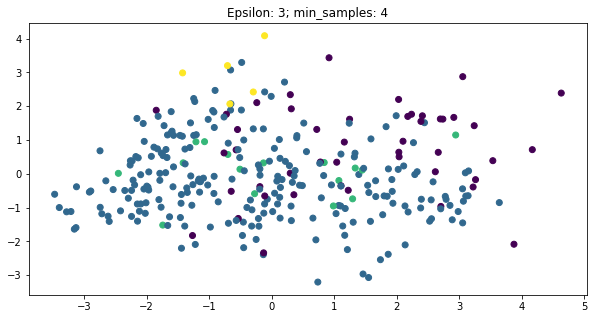

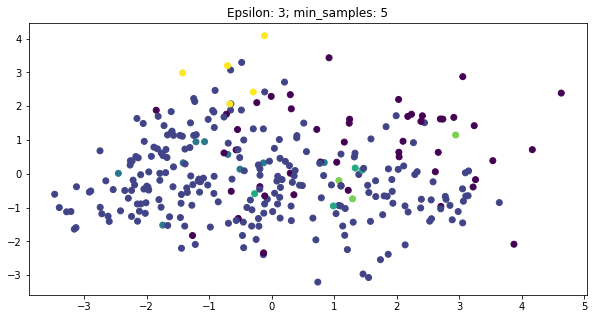

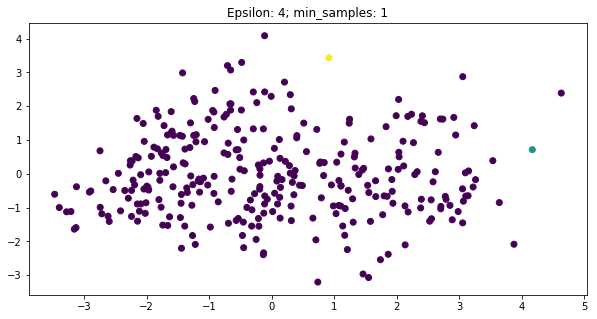

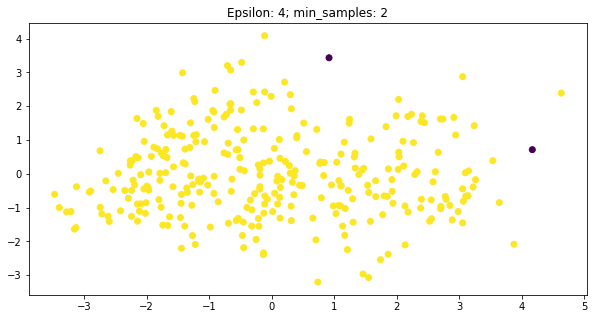

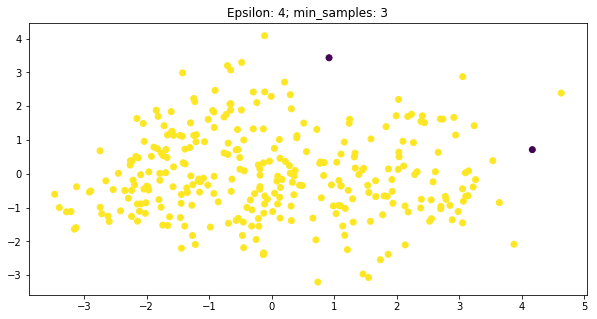

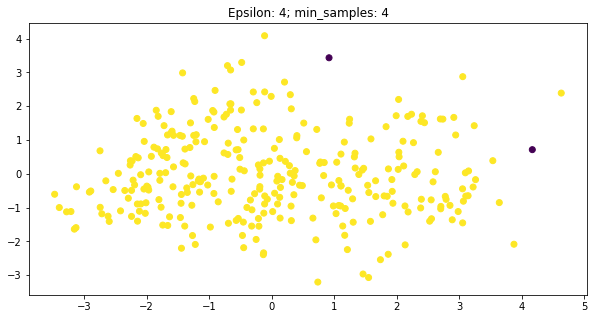

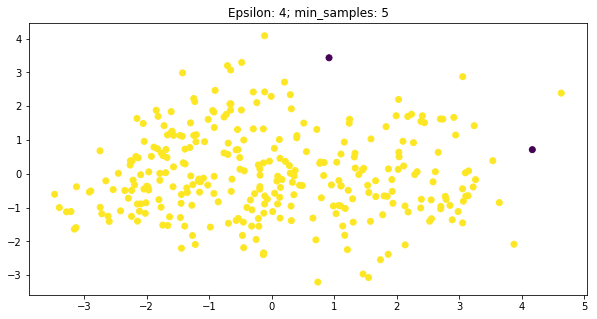

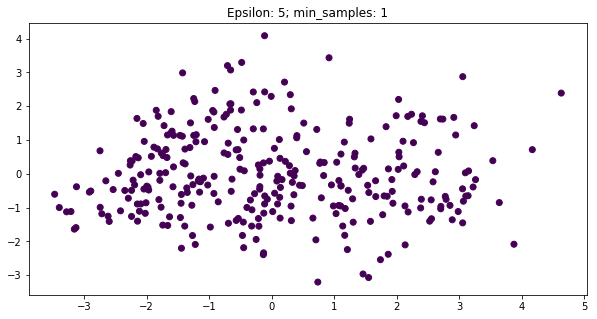

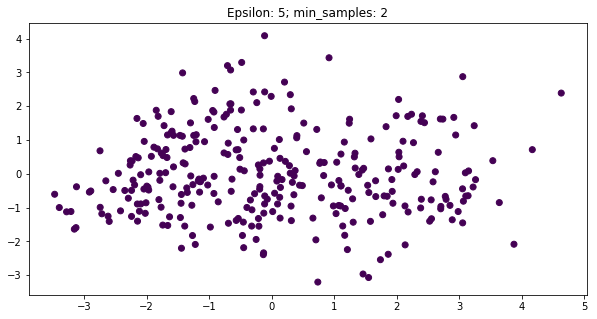

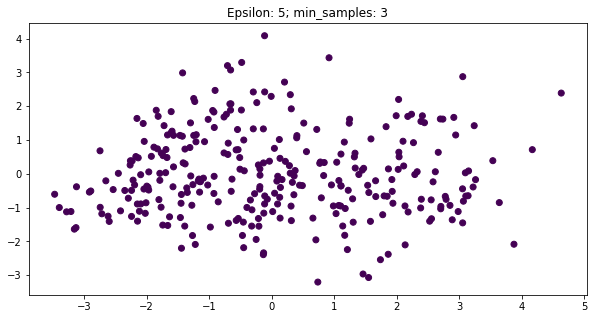

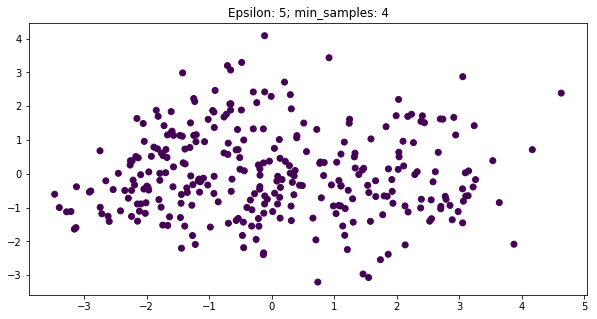

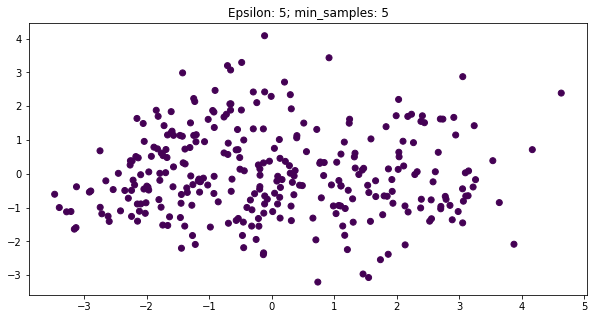

In [8]:
for ep in range(1,6):
    for samp in range(1,6):
        # Defining the clustering
        dbscan_cluster = DBSCAN(eps=ep, min_samples=samp)

        # Fit model
        clusters = dbscan_cluster.fit_predict(X_std)
        
        # Visualize clusters
        plt.figure(figsize=(10,5))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
        plt.title('Epsilon: {}; min_samples: {}'.format(ep, samp))
        plt.show()

## 2. Apply DBSCAN by setting parameters `eps=1, min_samples=1, metric="euclidean"`. Then, increase the value of `min_samples`. What's the effect of increasing `min_samples` on the number of clusters DBSCAN identifies?

In [9]:
for i in range(1, 30):
    # Defining the clustering
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    
    print('Number of clusters for min_samples = {}: {}'.format(i, len(np.unique(clusters))))

Number of clusters for min_samples = 1: 294
Number of clusters for min_samples = 2: 9
Number of clusters for min_samples = 3: 2
Number of clusters for min_samples = 4: 1
Number of clusters for min_samples = 5: 1
Number of clusters for min_samples = 6: 1
Number of clusters for min_samples = 7: 1
Number of clusters for min_samples = 8: 1
Number of clusters for min_samples = 9: 1
Number of clusters for min_samples = 10: 1
Number of clusters for min_samples = 11: 1
Number of clusters for min_samples = 12: 1
Number of clusters for min_samples = 13: 1
Number of clusters for min_samples = 14: 1
Number of clusters for min_samples = 15: 1
Number of clusters for min_samples = 16: 1
Number of clusters for min_samples = 17: 1
Number of clusters for min_samples = 18: 1
Number of clusters for min_samples = 19: 1
Number of clusters for min_samples = 20: 1
Number of clusters for min_samples = 21: 1
Number of clusters for min_samples = 22: 1
Number of clusters for min_samples = 23: 1
Number of clusters

The number of clusters decreases as `min_samples` increases.

## 3. Apply DBSCAN by setting parameters `eps=1, min_samples=1, metric="euclidean"`. Then, increase the value of `eps`. What's the effect of increasing `eps` on the number of clusters DBSCAN identifies?

In [10]:
for i in range(1, 30):
    # Defining the clustering
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    
    print('Number of clusters for eps = {}: {}'.format(i, len(np.unique(clusters))))

Number of clusters for eps = 1: 294
Number of clusters for eps = 2: 178
Number of clusters for eps = 3: 34
Number of clusters for eps = 4: 3
Number of clusters for eps = 5: 1
Number of clusters for eps = 6: 1
Number of clusters for eps = 7: 1
Number of clusters for eps = 8: 1
Number of clusters for eps = 9: 1
Number of clusters for eps = 10: 1
Number of clusters for eps = 11: 1
Number of clusters for eps = 12: 1
Number of clusters for eps = 13: 1
Number of clusters for eps = 14: 1
Number of clusters for eps = 15: 1
Number of clusters for eps = 16: 1
Number of clusters for eps = 17: 1
Number of clusters for eps = 18: 1
Number of clusters for eps = 19: 1
Number of clusters for eps = 20: 1
Number of clusters for eps = 21: 1
Number of clusters for eps = 22: 1
Number of clusters for eps = 23: 1
Number of clusters for eps = 24: 1
Number of clusters for eps = 25: 1
Number of clusters for eps = 26: 1
Number of clusters for eps = 27: 1
Number of clusters for eps = 28: 1
Number of clusters for e

The number of clusters decreases as epsilon increases.